let us go with basic mining valors: jsw, lwb, kghm, cle
NOTE: inflation and dividends are not taken into account

## download transform load sample ticker for analysis

In [4]:
from transform import download_transform_load
from const import *

In [ ]:
tickers = ["jsw", "lwb", "kgh", "cla"]
for ticker in tickers:
    download_transform_load(ticker, DATA_DOWNLOAD_SOURCE.STOOQ_PL, DATABASE_TYPE.SQLITE)

INFO:root:Stock returned jsw
INFO:root:Dataframe cleaned
INFO:root:Dataframe saved to database
INFO:root:Stock returned lwb
INFO:root:Dataframe cleaned
INFO:root:Dataframe saved to database
INFO:root:Stock returned kgh
INFO:root:Dataframe cleaned
INFO:root:Dataframe saved to database
INFO:root:Stock returned cla
INFO:root:Dataframe cleaned
INFO:root:Dataframe saved to database


## SQL data exploration

In [4]:
%load_ext sql
%sql sqlite:///SQLite.db

In [5]:
%%sql
SELECT name FROM sqlite_master WHERE type='table';

 * sqlite:///SQLite.db
Done.


KeyError: 'DEFAULT'

NOTE sql magic does not work properly, let us use sqlite3 cursor as mock of sql magic

In [2]:
import pandas as pd
import sqlite3
from pprint import pprint
def mock_sql_magic(query:str, return_data:bool=False):
    try:
        conn = sqlite3.connect("SQLite.db")
        cursor = conn.cursor()
        cursor.execute(query)
        result = cursor.fetchall()
        if not return_data:
            pprint(result)
    finally:
        conn.close()
    if return_data:
        return result

In [4]:
#check sample count
mock_sql_magic("select count(*) from jsw")
mock_sql_magic("select count(*) from lwb")
mock_sql_magic("select count(*) from kgh")
mock_sql_magic("select count(*) from cla")

[(3600,)]
[(4113,)]
[(7107,)]
[(899,)]


In [8]:
#check interlocking period
mock_sql_magic("select count(*) from cla inner join kgh on cla.date == kgh.date")

[(897,)]


In [9]:
#check basic statistic
mock_sql_magic("select avg(volume), min(volume), max(volume) from jsw")

[(534037.2415902141, 17080, 8471186)]


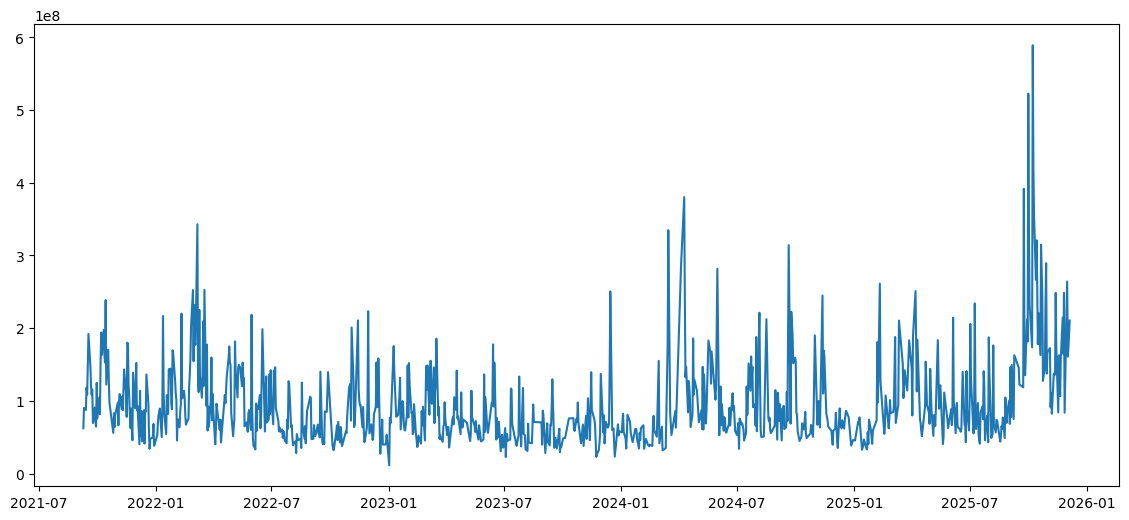

In [6]:
# check monetary difference between kgh and cla
from matplotlib import pyplot as plt
data = mock_sql_magic("select cla.date, kgh.close*kgh.volume - cla.close*cla.volume from cla join kgh on cla.date = kgh.date", return_data=True)
df = pd.DataFrame(data, columns=["date", "value_difference"])
df["date"] = pd.to_datetime(df["date"])
df = df.set_index(df["date"])
df = df.drop(columns="date")
plt.figure(figsize=(14,6))
plt.plot(df)
plt.show()

## Pandas based EDA

INFO:root:Dataframe loaded from database
f:\codes\projekty\etl_finance_demo\etl_finance_demo\src\DataEDA.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figs.show()


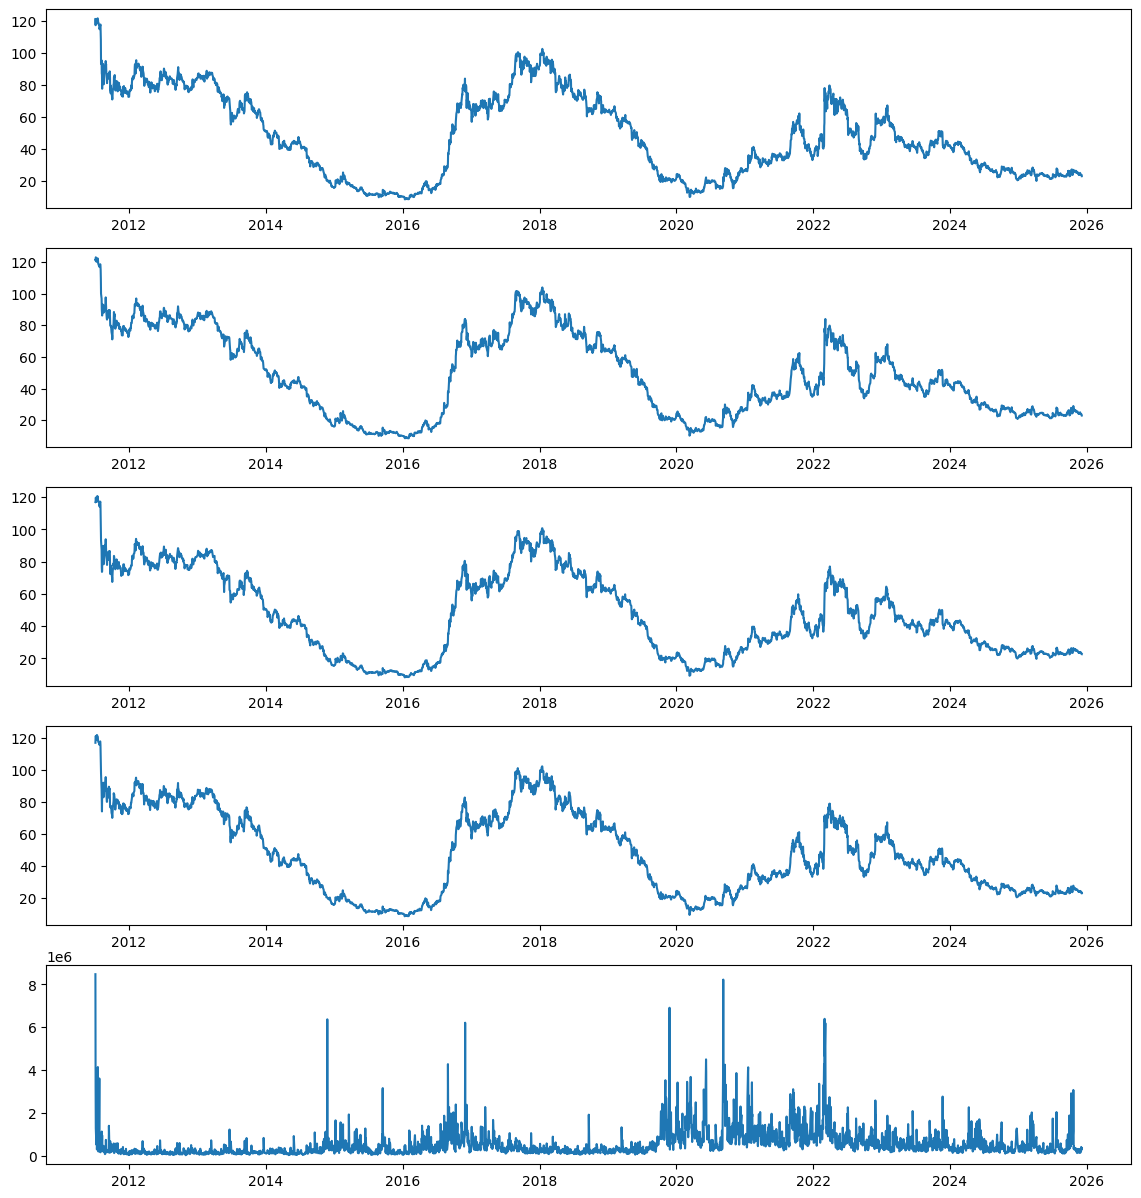

In [1]:
from src.DataEDA import DataEDA
from const import DATABASE_TYPE
from src.storage.storage_factory import get_storage
storage_inst = get_storage(DATABASE_TYPE.SQLITE)
eda_jsw = DataEDA(storage_inst, "jsw")
eda_jsw.plot_ticker()

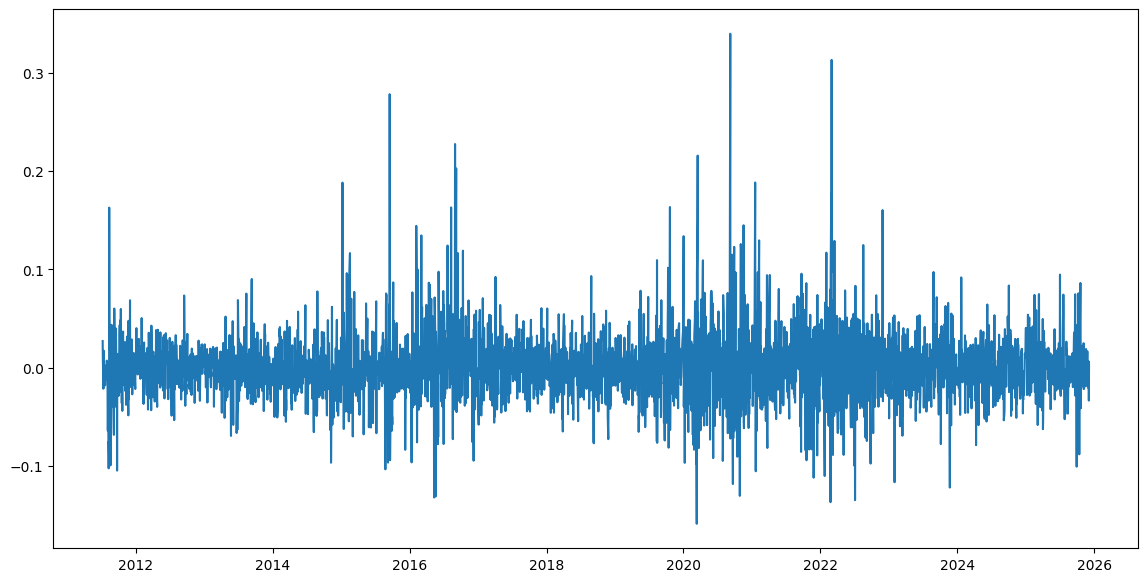

In [10]:
eda_jsw.featureEngineer.add_returns()
eda_jsw.plot_feature("returns")

['open' 'high' 'low' 'close' 'volume' 'returns' 'macd' 'macd_signal'
 'macd_hist']


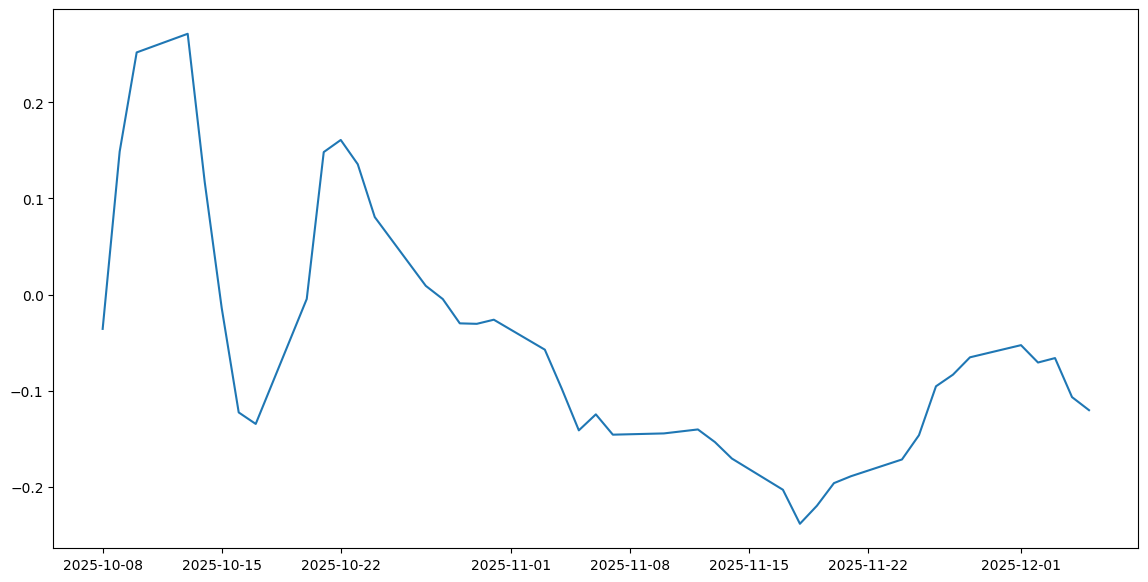

In [11]:
import datetime
eda_jsw.featureEngineer.add_MACD()
eda_jsw.get_feature_names()
eda_jsw.plot_feature("macd_hist", datetime.datetime.now() - datetime.timedelta(60))

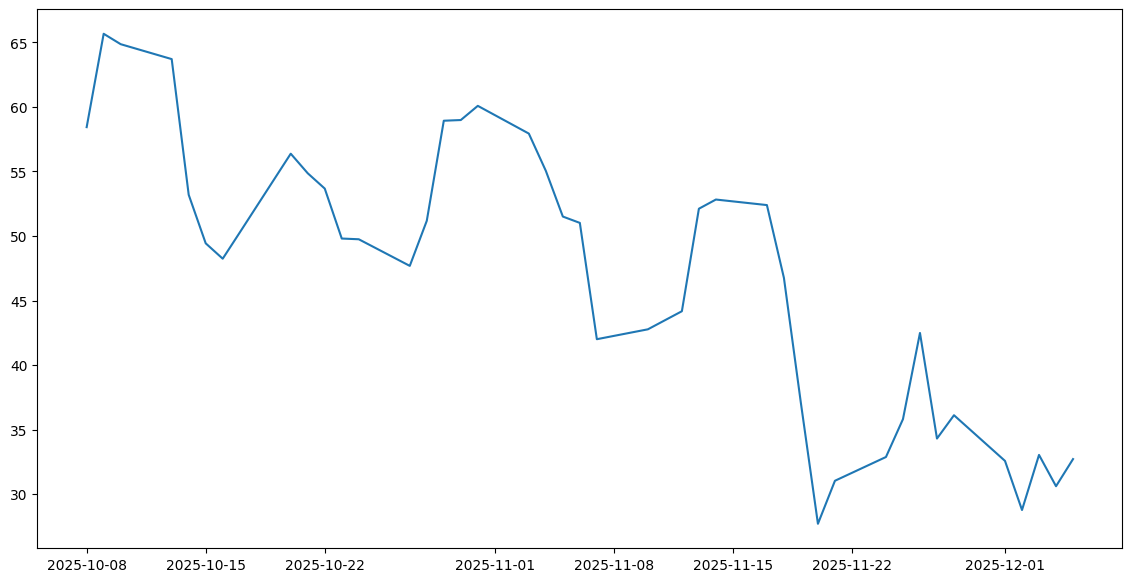

In [12]:
eda_jsw.featureEngineer.add_RSI(period=21)
eda_jsw.plot_feature("RSI", datetime.datetime.now() - datetime.timedelta(60))

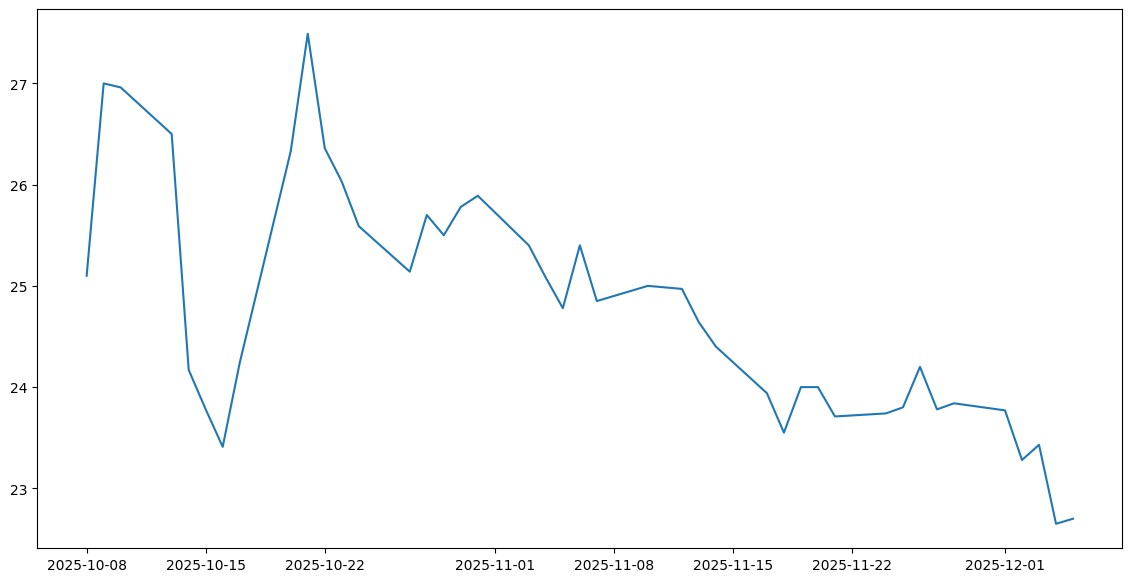

In [13]:
eda_jsw.plot_feature("close", datetime.datetime.now() - datetime.timedelta(60))